In [1]:
from tensorflow import keras
from matplotlib import pyplot as plt

2025-04-11 08:46:10.978696: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-11 08:46:10.982412: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-11 08:46:10.994200: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744340471.013861   22778 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744340471.019888   22778 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744340471.034175   22778 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:


model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])



E0000 00:00:1744340479.131585   22778 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1744340479.134546   22778 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/uzzu/Desktop/python/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:


model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



In [4]:
import numpy as np


num_samples = 1000
sequence_length = 50


X = np.zeros((num_samples, sequence_length, 1))
y = np.zeros((num_samples, sequence_length), dtype=np.int32)

for i in range(num_samples):
    freq = np.random.uniform(0.1, 0.5)
    phase = np.random.uniform(0, 2 * np.pi)
    t = np.linspace(0, 2 * np.pi, sequence_length)
    sin_wave = np.sin(freq * t + phase)
    
    X[i, :, 0] = sin_wave
    

    y[i] = np.digitize(sin_wave, bins=np.linspace(-1, 1, 10), right=True)

y = y[:, :24]

In [5]:
history = model.fit(X, y, epochs=20)

Epoch 1/20


ValueError: Arguments `target` and `output` must have the same shape up until the last dimension: target.shape=(None, 24), output.shape=(None, 50, 10)

In [6]:
history_dict = history.history

NameError: name 'history' is not defined

NameError: name 'history_dict' is not defined

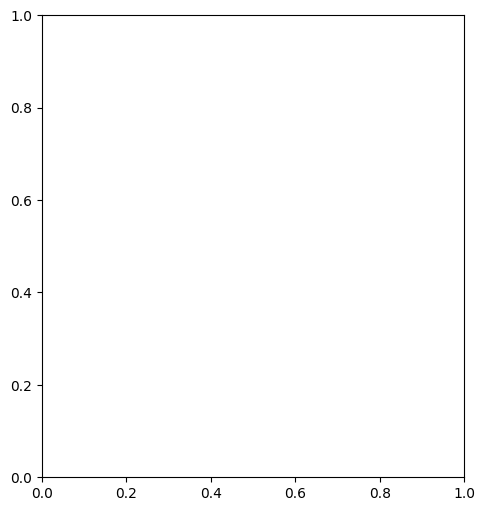

In [7]:


plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

